# import

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/media/zero/dropbox/Dropbox/Data science project'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import fastai
from fastai.imports import *
from fastai.structured import *

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import taproc

In [4]:
from taproc.eda import *

In [5]:
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import plotnine
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import gc

In [7]:
from os import path

# read file 

In [8]:
def file_process(file_name = None, column_name = None, df_proc = None, limit = None):
    if file_name is not None:
        df = pd.read_csv(str(file_name) + '.csv', low_memory= False)
        if limit is not None:
            df = df[:limit]
        gc.collect()
        train_cats(df) #convert to category
        df_proc, num_cols = proc_df2(df, y_fld = None, max_n_cat= 10) #processing df
    
    return df, df_proc, num_cols

In [9]:
def proc_df2(df, y_fld = None, skip_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    df = df.copy()
    if preproc_fn: preproc_fn(df)
    
    y = y_fld
    if y_fld is not None:
        y = df[y_fld].values
        df.drop(skip_flds+[y_fld], axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
        
    num_cols = df._get_numeric_data().columns
    sk_id_notin = ['SK_ID_BUREAU', 'SK_ID_CURR', 'SK_ID_PREV'] 
    num_cols = list([i for i in num_cols if i not in sk_id_notin and not i.endswith('na')])
    
    res = [pd.get_dummies(df, dummy_na=True), num_cols]
    if do_scale: res = res + [mapper]
    return res

In [10]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [31]:
app_train, app_train_proc, _ = file_process(file_name = file_path/'application_train')
app_train_y = app_train['TARGET']

In [28]:
#app_train_proc.drop(columns= ['TARGET'], axis = 1, inplace=True)

In [13]:
app_test, app_test_proc, _ = file_process(file_name = file_path/'application_test')

## bureau

In [16]:
bureau, bureau_proc, _ = file_process(file_name = file_path/'bureau')

In [17]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# EDA

## distibution of target

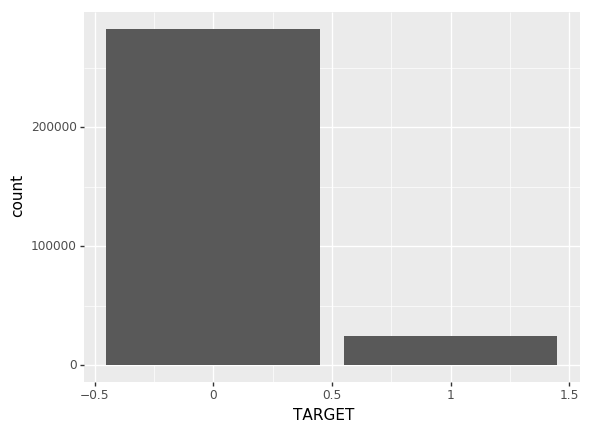

<ggplot: (8741109936704)>

In [47]:
(ggplot(app_train)
    + aes('TARGET')
    + geom_bar())

## missing data

In [15]:
mss = missing.from_df(app_train)

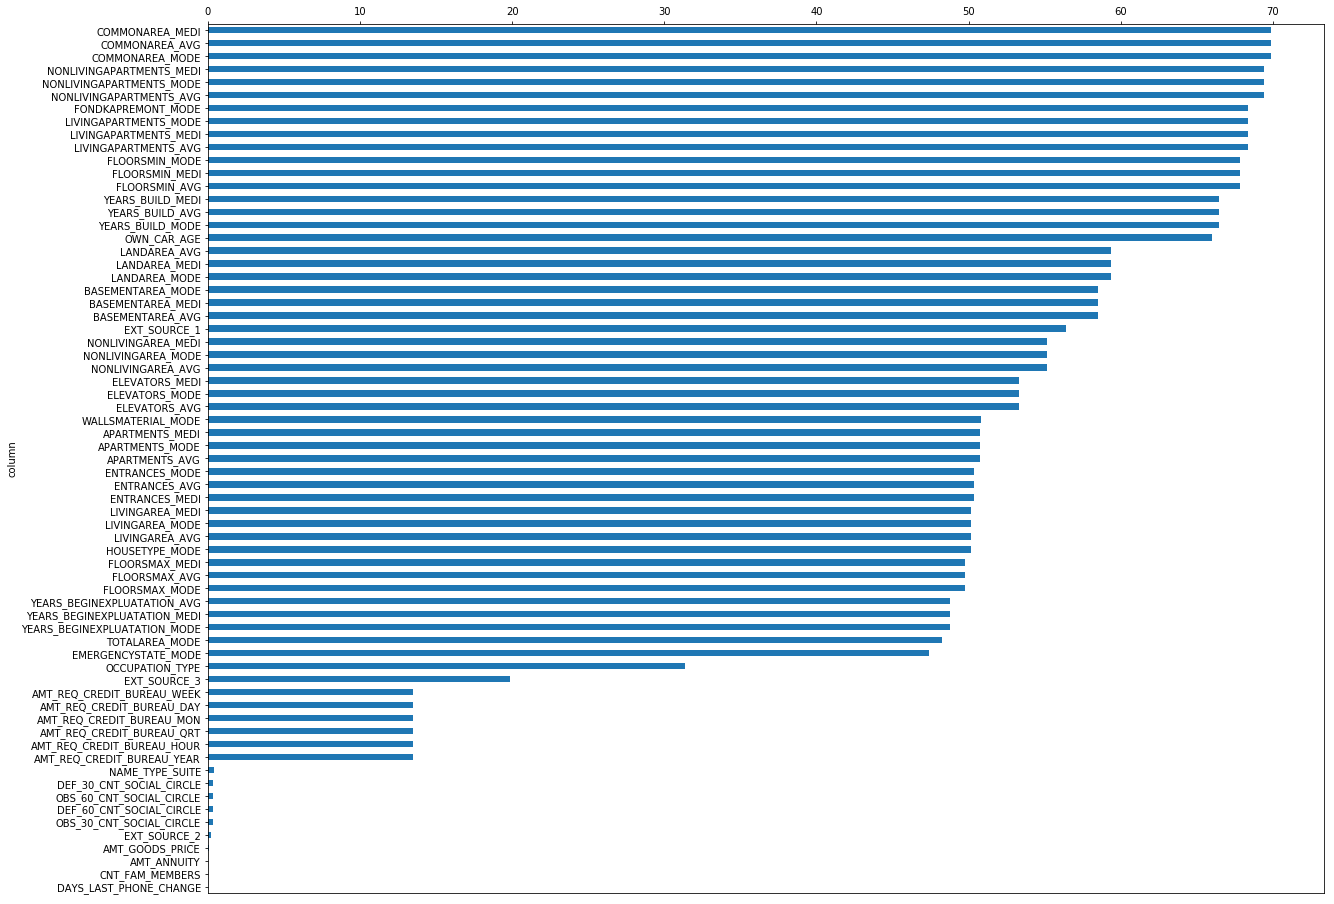

In [16]:
mss.plot()

In [17]:
mss.top(5)

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE']

In [18]:
mss[:5]

,column,missing_percent
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963


## correlation

In [19]:
corr = correlation.from_df(app_train, 'TARGET')

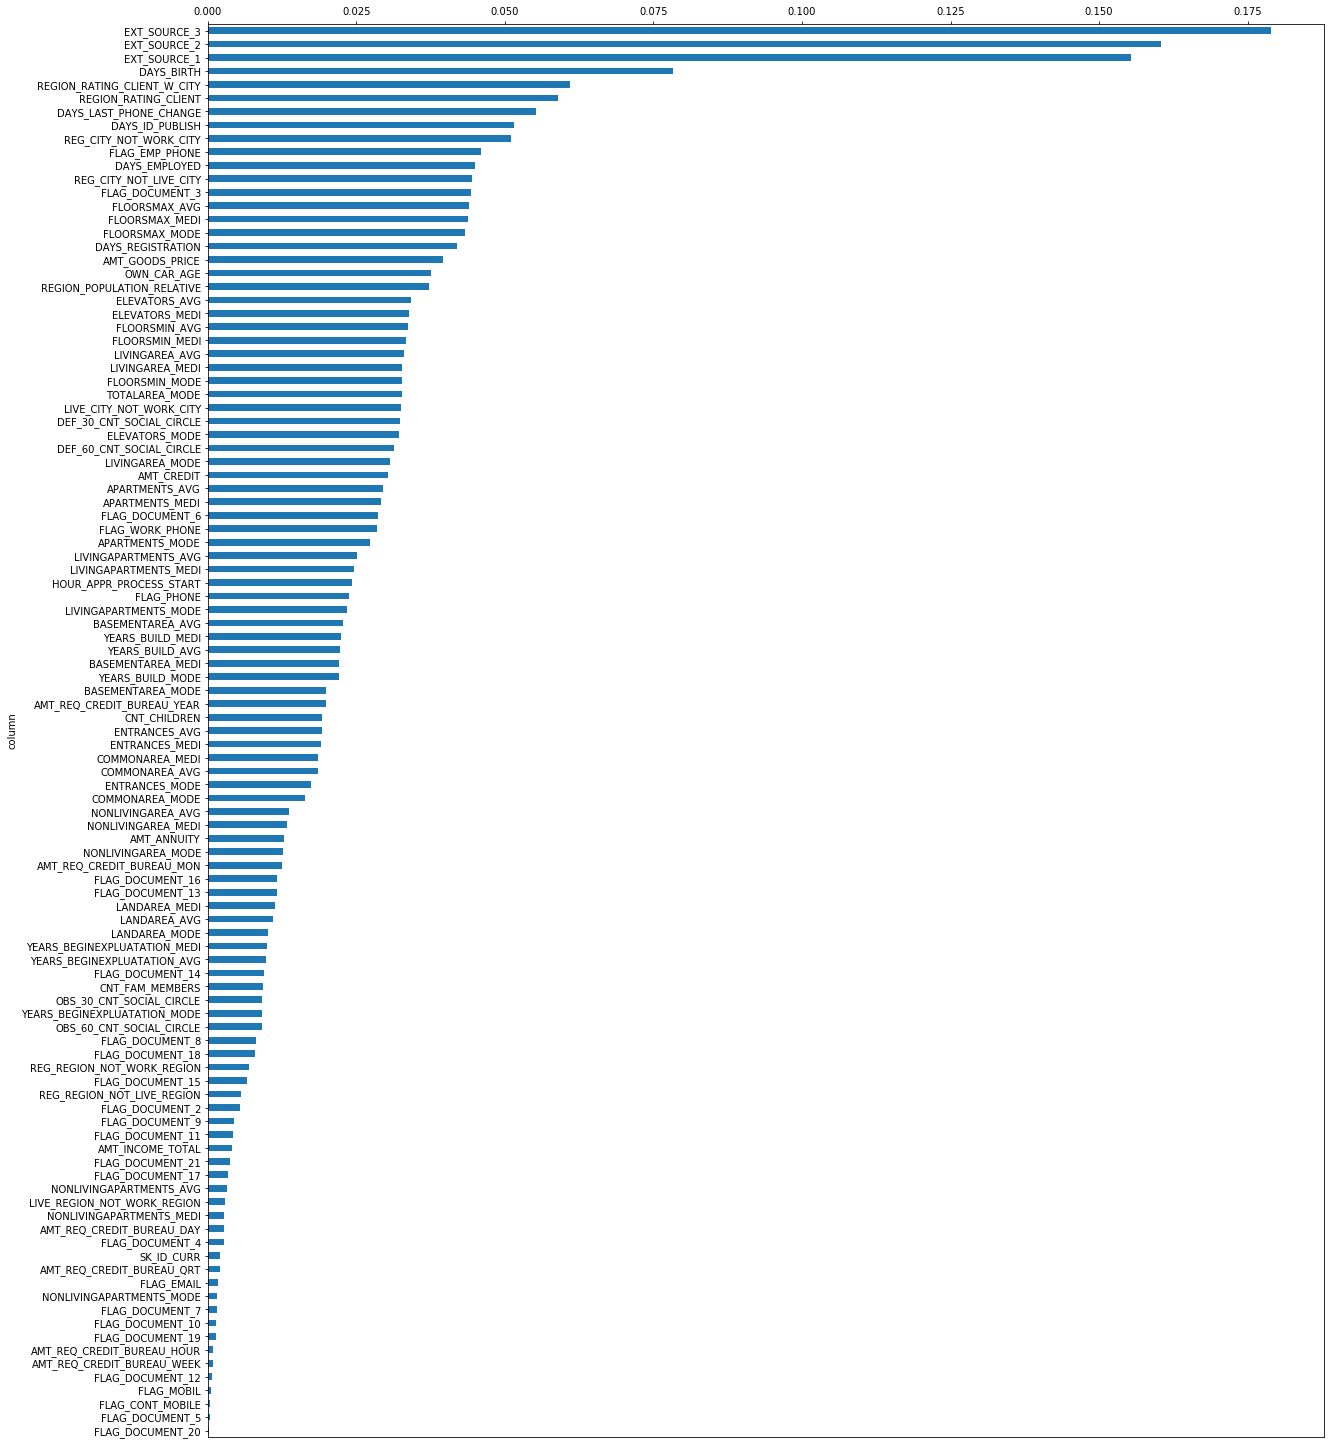

In [20]:
corr.plot()

In [21]:
corr.top(5)

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY']

In [489]:
corr[:5]

,column,corr,neg
31,EXT_SOURCE_3,0.178919,True
30,EXT_SOURCE_2,0.160472,True
29,EXT_SOURCE_1,0.155317,True
8,DAYS_BIRTH,0.078239,False
21,REGION_RATING_CLIENT_W_CITY,0.060893,False


## histogram

In [22]:
hist = histogram.from_df(app_train, 'DAYS_BIRTH')

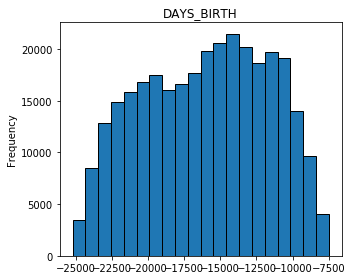

In [23]:
hist.plot()

## kde plot

In [14]:
kde = KernelDensityEstimation.from_df(app_train, 'TARGET', ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

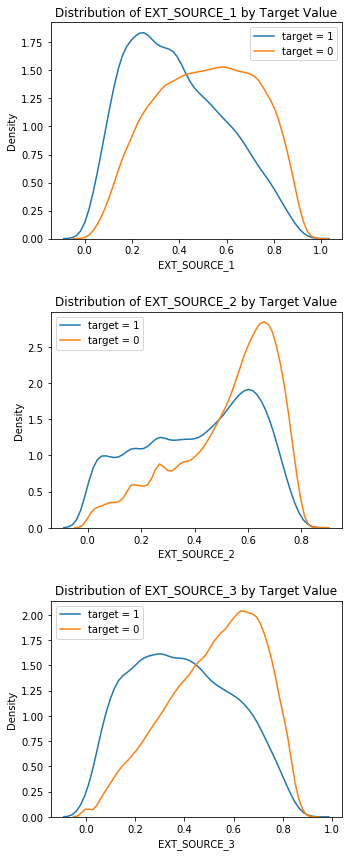

In [15]:
kde.plot()

In [ ]:
### the younger is more likely to not pay the loan on time

# feature enginerring

after create new feature, lets check by correlation with target variable

## countinous vars

mean, median, prod, sum, std, var, max, min, 

In [ ]:
### customize aggreate function

In [67]:
def suma(x): return np.sum(x)

In [68]:
agg_params = {'AMT_CREDIT_MAX_OVERDUE' : [suma, 'sum', 'min'], 
              'AMT_CREDIT_SUM' : ['min', 'max']}

In [74]:
def aggreate(df, params, by_col):
    df_agg = df[list(params.keys()) + to_list(by_col)].groupby(by_col).agg(params).reset_index()
    agg_cols = ['_'.join([i for i in c if i != '']) for c in df_agg.columns.tolist()]
    df_agg.columns = agg_cols
    return df_agg

In [69]:
by_col = 'SK_ID_CURR'

In [70]:
bureau_proc_agg = bureau_proc[list(agg_params.keys()) + to_list(by_col)].groupby(by_col).agg(agg_params).reset_index()

In [71]:
agg_cols = ['_'.join([i for i in c if i != '']) for c in bureau_proc_agg.columns.tolist()]

In [72]:
bureau_proc_agg.columns = agg_cols

In [73]:
bureau_proc_agg.head()

,SK_ID_CURR,AMT_CREDIT_MAX_OVERDUE_suma,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max
0,100001,0.000,0.000,0.0,85500.0,378000.0
1,100002,8405.145,8405.145,0.0,0.0,450000.0
2,100003,0.000,0.000,0.0,22248.0,810000.0
3,100004,0.000,0.000,0.0,94500.0,94537.8
4,100005,0.000,0.000,0.0,29826.0,568800.0


In [ ]:
bureau_proc.groupby('SK_ID_CURR', as_index=False).count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [23]:
previous_loan_count = bureau_proc.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [26]:
app_train_proc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1


In [32]:
app_train_proc = app_train_proc.merge(previous_loan_count, on = 'SK_ID_CURR', how = 'left')

In [33]:
app_train_proc.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,previous_loan_counts
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,1,0,0,1,0,0,8.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,1,0,0,4.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,0,1,2.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,1,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,1,0,0,1,1.0


In [34]:
kde_new = KernelDensityEstimation.from_df(app_train_proc, 'TARGET', 'previous_loan_counts')

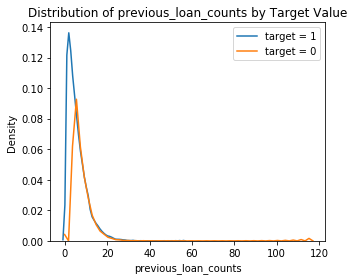

In [35]:
kde_new.plot()

# baseline model

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [203]:
random_forest.fit(app_train_proc, app_train_y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [213]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': app_train_proc.columns, 'importance': feature_importance_values})

In [377]:
class ft_ipt:
    def __init__(self, df):
        self.df = df.sort_values(by = 'importance', ascending=True) #, inplace=True
    
    def __getitem__(self, key):
        return self.df.__getitem__(key)
    
    def top_ft(self, n):
        return self.df.feature.values.tolist()[-n:]
    
    def plot(self):
        return self.df.plot(x = 'feature',
                            kind = 'barh', 
                            figsize=(20, df_desc.shape[0]//4), 
                            legend=False)

In [378]:
importance = ft_ipt(feature_importances)

In [427]:
importance[:5]

,feature,importance
196,NAME_INCOME_TYPE_nan,0.0
202,NAME_EDUCATION_TYPE_nan,0.0
88,FLAG_DOCUMENT_10,0.0
176,FLAG_OWN_CAR_nan,0.0
209,NAME_FAMILY_STATUS_nan,0.0


In [379]:
importance.top_ft(5)

['DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2']

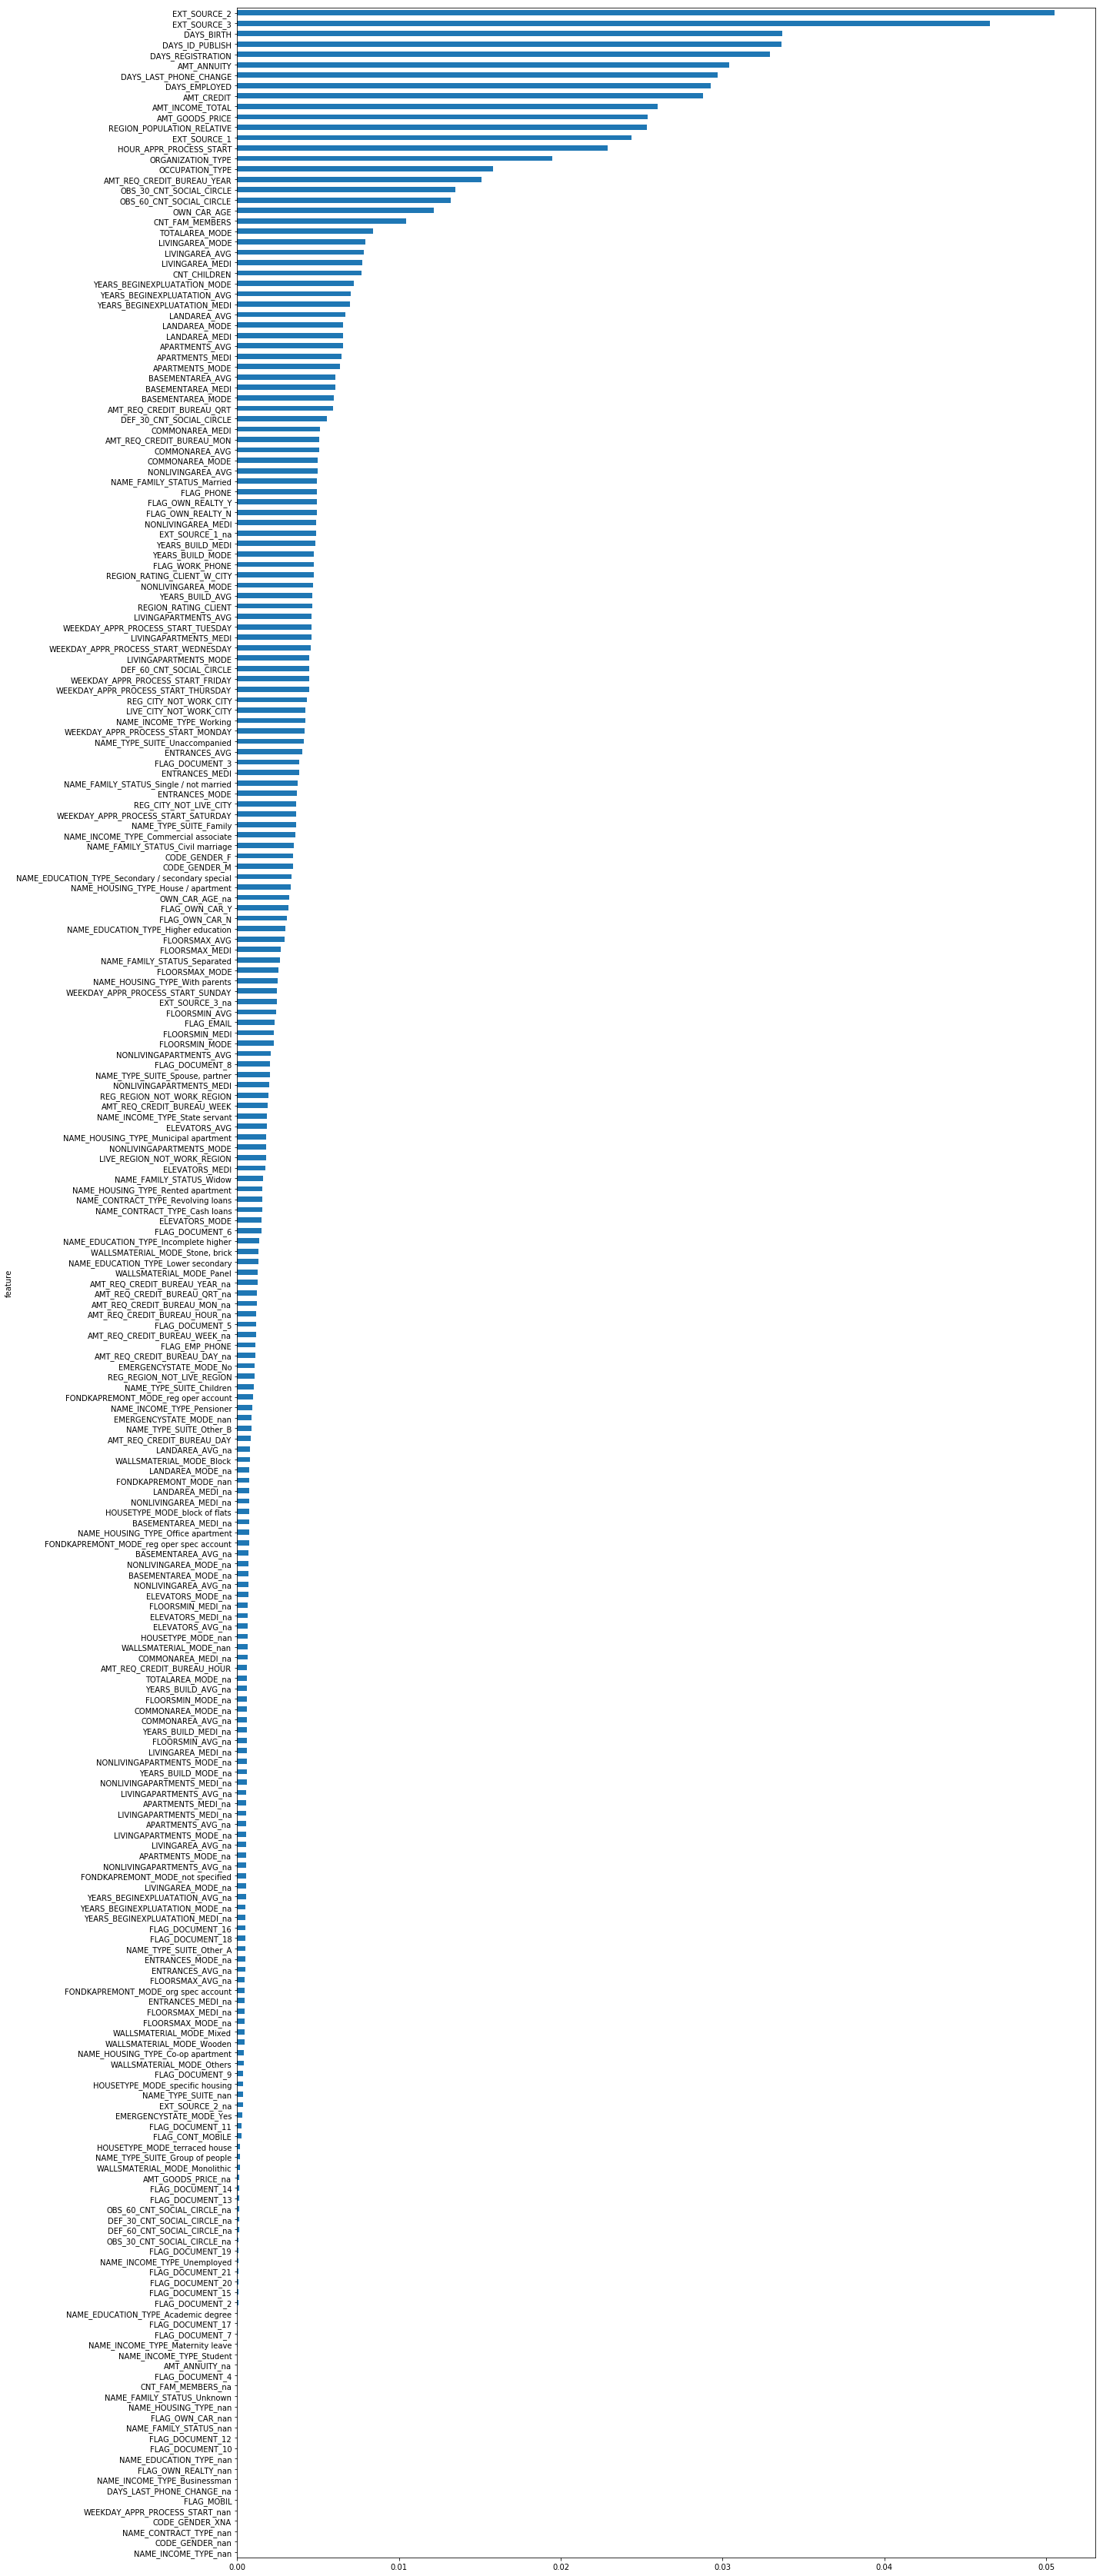

In [278]:
importance.plot()

# dendrogram

In [299]:
from scipy.cluster import hierarchy as hc

In [369]:
class dendrogram:
    def __init__(self, df):
        self.df = df
        self.columns = self.df.columns
        self.z = self.cal_z(df)
        self.result = self.make_result()
    
    def chk_ft(self, n):
        fts = self.result[:n][['col1', 'col2']].values.tolist()
        return [item for sublist in fts for item in sublist]
    
    @staticmethod
    def cal_z(df):
        corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
        corr_condensed = hc.distance.squareform(1-corr)
        return hc.linkage(corr_condensed, method='average')
        
    def make_result(self):
        z2 = [[self.columns[int(i[0])], self.columns[int(i[1])], i[2]] for i in self.z if i[3] == 2]
        result = pd.DataFrame.from_dict({'col1': [i[0] for i in z2],
                                       'col2': [i[1] for i in z2],
                                       'dist': [i[2] for i in z2]})
        return result
        
    def plot(self):
        fig = plt.figure(figsize=(10,self.df.shape[1]//2.5))
        dendrogram = hc.dendrogram(z, 
                                    labels=self.columns, 
                                    orientation='left', 
                                    leaf_font_size=16)
        plt.show()

In [301]:
app_train_keep = app_train_proc[importance.top_ft(20)]

In [320]:
app_train_keep.shape

(307511, 20)

In [370]:
ddg = dendrogram(app_train_keep)

In [373]:
ddg.result

,col1,col2,dist
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.0027
1,AMT_CREDIT,AMT_GOODS_PRICE,0.0156
2,DAYS_EMPLOYED,ORGANIZATION_TYPE,0.5642
3,DAYS_BIRTH,EXT_SOURCE_1,0.6629
4,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.8150
5,DAYS_ID_PUBLISH,OCCUPATION_TYPE,0.8400


In [371]:
ddg.chk_ft(2)

['OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE']

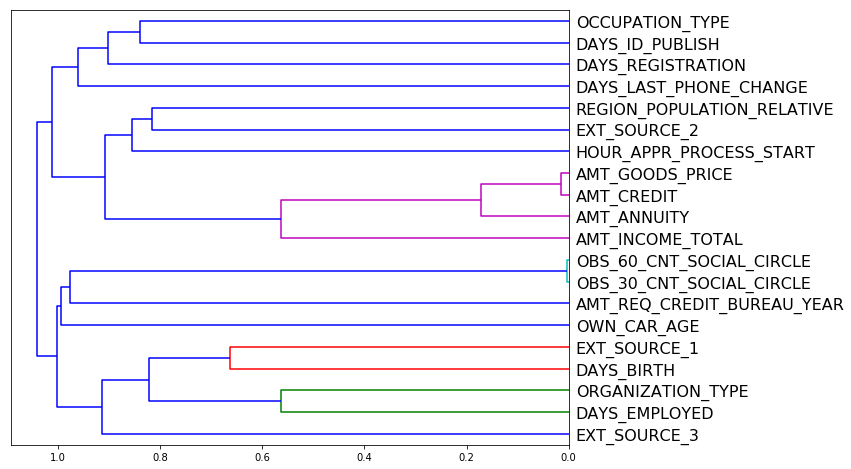

In [361]:
ddg.plot()

# plot and select feature by important

# model interpretation